<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/Ejercicio_funciones_de_Transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para sistema masa resorte amortiguador

In [36]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.8 MB/s eta 0:00:00


In [37]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np


sym.init_printing()

s = sym.symbols('s', complex=True)
t, m, c, k = sym.symbols('t m c k', positive=True, real=True)

# Entrada de interés en Laplace
X = 1  # X(s) = 1 Respuesta a impulso; X(s) = 1/s respuesta a escalón, X(s) = 1/s**2 respuesta a la rampa

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m * s**2 + c * s + k)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [38]:
# Evaluar valores específicos para m, c y k
param_values = {m: 4, c: sym.Rational('0.9'), k: sym.Rational('0.8')}
H_evaluated = H.subs(param_values)

H, p1, p2, H_evaluated

⎛                                      _____________                        _____________          ↪
⎜                                     ╱     2                              ╱     2                 ↪
⎜                                    ╱     c                              ╱     c                  ↪
⎜                        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1           1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1           ↪
⎜      1            c             ╲╱      4⋅k⋅m          c             ╲╱      4⋅k⋅m             1 ↪
⎜──────────────, - ─── + ───────────────────────────, - ─── - ───────────────────────────, ─────── ↪
⎜             2    2⋅m               √m                 2⋅m               √m                  2    ↪
⎜c⋅s + k + m⋅s                                                                             4⋅s  +  ↪
⎝                                                                                                  ↪

↪        ⎞
↪        ⎟
↪        ⎟
↪        ⎟
↪        ⎟
↪ ───────⎟
↪ 9⋅s   4⎟
↪ ─── + ─⎟
↪ 

In [39]:
# Imprimir valores evaluados
print('p1 =', p1.subs(param_values))
print('p2 =', p2.subs(param_values))
print('xi =', xi.subs(param_values))
print('omega_n =', wn.subs(param_values))

H, p1, p2, H_evaluated


p1 = -9/80 + 0.0125*sqrt(1199)*I
p2 = -9/80 - 0.0125*sqrt(1199)*I
xi = 9*sqrt(5)/80
omega_n = sqrt(5)/5


⎛                                      _____________                        _____________          ↪
⎜                                     ╱     2                              ╱     2                 ↪
⎜                                    ╱     c                              ╱     c                  ↪
⎜                        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1           1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1           ↪
⎜      1            c             ╲╱      4⋅k⋅m          c             ╲╱      4⋅k⋅m             1 ↪
⎜──────────────, - ─── + ───────────────────────────, - ─── - ───────────────────────────, ─────── ↪
⎜             2    2⋅m               √m                 2⋅m               √m                  2    ↪
⎜c⋅s + k + m⋅s                                                                             4⋅s  +  ↪
⎝                                                                                                  ↪

↪        ⎞
↪        ⎟
↪        ⎟
↪        ⎟
↪        ⎟
↪ ───────⎟
↪ 9⋅s   4⎟
↪ ─── + ─⎟
↪ 

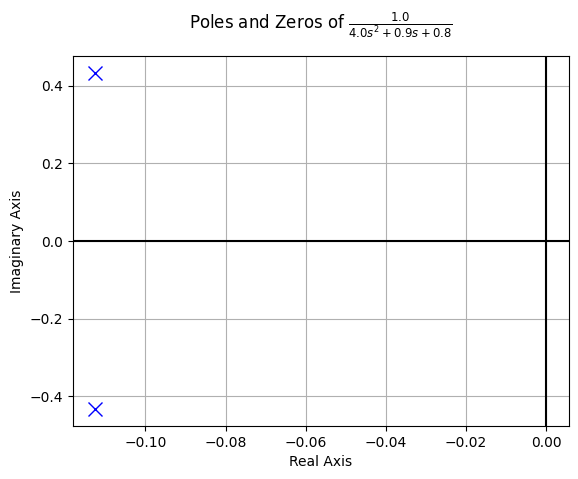

In [40]:
from sympy import symbols, fraction, cancel
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

# Definir la variable de Laplace
s = symbols('s', complex=True)
m, c, k = symbols('m c k', positive=True, real=True)

# Función de transferencia del sistema masa-resorte-amortiguador
H = 1 / (m * s**2 + c * s + k)

# Evaluar valores específicos para m, c y k
param_values = {m: 4, c: 0.9, k: 0.8}
H_evaluated = H.subs(param_values)

# Obtener numerador y denominador
num, den = fraction(cancel(H_evaluated))

# Crear función de transferencia y graficar polos y ceros
tf1 = TransferFunction(num, den, s)
pole_zero_plot(tf1)


In [41]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

      1       
──────────────
             2
c⋅s + k + m⋅s 

In [42]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


      1       
──────────────
             2
c⋅s + k + m⋅s 

In [43]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

0

In [44]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(param_values).apart(s)
Ye

         0.25         
──────────────────────
     2                
1.0⋅s  + 0.225⋅s + 0.2

In [45]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                  -0.1125⋅t                        
2.31036392903163⋅ℯ         ⋅sin(0.43283224232952⋅t)

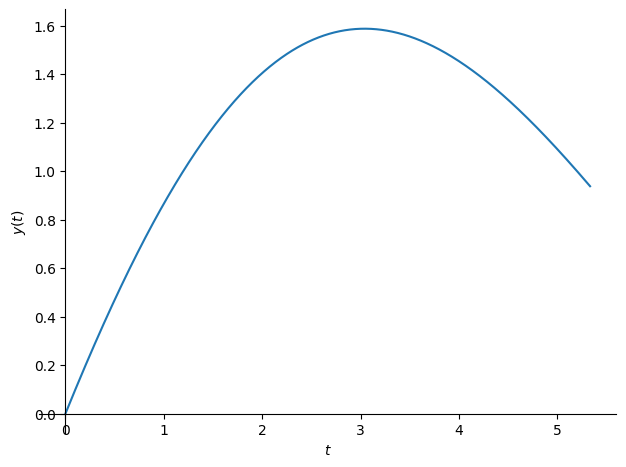

In [46]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(param_values))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

Analisis del grafico:
La curva comienza en
0
y crece hasta un valor máximo antes de descender nuevamente.
Esto sugiere un comportamiento típico de un sistema subamortiguado (con oscilaciones) o críticamente amortiguado (sin oscilaciones pero con un pico máximo)
Si este es el desplazamiento
𝑦(t) de un sistema masa-resorte, indica que la masa empieza en reposo, acelera debido a una fuerza externa (como una entrada impulso o escalón) y luego se desacelera por efecto de la amortiguación y la elasticidad del resorte.
El punto máximo representa el instante en el que la velocidad es cero antes de que la masa comience a regresar a su posición de equilibrio.

Para sistema equivalente masa rwsorte amortiguador a partir del circuito electrico

p1 = -1/4 + 0.25*sqrt(39)*I
p2 = -1/4 - 0.25*sqrt(39)*I
xi = sqrt(10)/20
omega_n = sqrt(10)/2
Y(s) = 1/(s**2 + s/2 + 5/2)


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


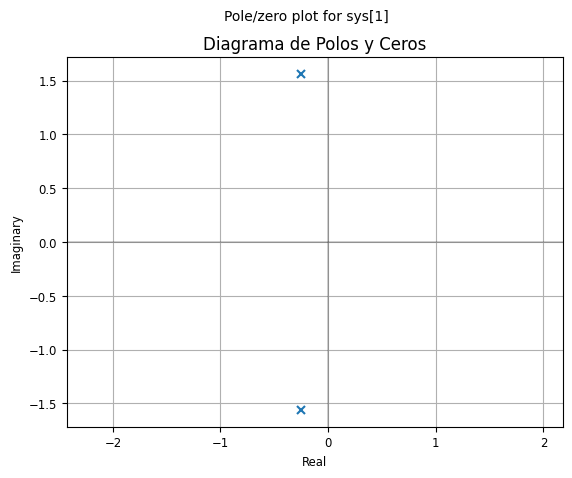

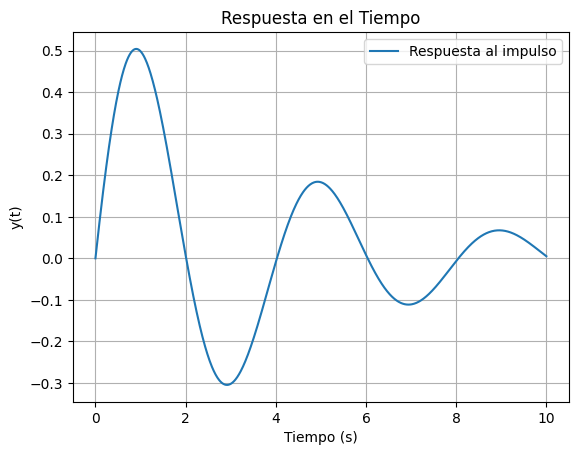

⎛                                                   ____________                     ____________  ↪
⎜                                                  ╱      2                         ╱      2       ↪
⎜                                                 ╱    C⋅R                         ╱    C⋅R        ↪
⎜                                        1.0⋅ⅈ⋅  ╱   - ──── + 1           1.0⋅ⅈ⋅  ╱   - ──── + 1   ↪
⎜      1               1            R          ╲╱      4⋅L           R          ╲╱      4⋅L        ↪
⎜──────────────, ──────────────, - ─── + ───────────────────────, - ─── - ───────────────────────, ↪
⎜   2         1     2         1    2⋅L            √C⋅√L             2⋅L            √C⋅√L           ↪
⎜L⋅s  + R⋅s + ─  L⋅s  + R⋅s + ─                                                                    ↪
⎝             C               C                                                                    ↪

↪                        ⎞
↪                        ⎟
↪                        ⎟
↪        

In [48]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import control as ctl  # Librería alternativa para sistemas de control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, L, R, C = sym.symbols('t L R C', positive=True, real=True)

# Entrada de interés en Laplace
X = 1  # X(s) = 1 Respuesta a impulso; X(s) = 1/s respuesta a escalón, X(s) = 1/s**2 respuesta a la rampa

# Función de transferencia del sistema eléctrico
H = 1 / (L * s**2 + R * s + (1 / C))

# Función de salida según entrada de interés
Y = H * X  # Función de transferencia multiplicada por la entrada X(s)

# Cálculo de los polos
xi = R / (2 * sym.sqrt(L / C))  # Factor de amortiguamiento
wn = sym.sqrt(1 / (L * C))  # Frecuencia natural
p1 = -xi * wn + 1j * wn * sym.sqrt(1 - xi**2)
p2 = -xi * wn - 1j * wn * sym.sqrt(1 - xi**2)

# Evaluar valores específicos para L, R y C
param_values = {L: 1, R: sym.Rational('0.5'), C: sym.Rational('0.4')}
H_evaluated = H.subs(param_values)
Y_evaluated = Y.subs(param_values)

# Imprimir valores evaluados
print('p1 =', p1.subs(param_values))
print('p2 =', p2.subs(param_values))
print('xi =', xi.subs(param_values))
print('omega_n =', wn.subs(param_values))
print('Y(s) =', Y_evaluated)

# Extraer numerador y denominador
num, den = sym.fraction(sym.cancel(H_evaluated))
num = [float(num)] if num.is_Number else [float(c) for c in sym.Poly(num, s).all_coeffs()]
den = [float(c) for c in sym.Poly(den, s).all_coeffs()]

# Crear y graficar la función de transferencia
tf1 = ctl.TransferFunction(num, den)
plt.figure()
ctl.pzmap(tf1, plot=True)
plt.title("Diagrama de Polos y Ceros")
plt.grid()
plt.show()

# Gráfica de la respuesta en el tiempo
t_values = np.linspace(0, 10, 1000)
t_out, y_out = ctl.impulse_response(tf1, t_values)
plt.figure()
plt.plot(t_out, y_out, label="Respuesta al impulso")
plt.xlabel("Tiempo (s)")
plt.ylabel("y(t)")
plt.title("Respuesta en el Tiempo")
plt.legend()
plt.grid()
plt.show()

H, Y, p1, p2, H_evaluated, Y_evaluated


Analisis del grafico:
La señal oscila antes de estabilizarse, lo que indica que el sistema es subamortiguado
A medida que pasa el tiempo, la oscilación disminuye, lo que indica que el sistema eventualmente se estabiliza en 0.
